In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.stats.meta_analysis import combine_effects

# Example data: replace with your actual performance metrics
data = {
    'Model': ['BRR', 'SVR', 'NN', 'BRR', 'SVR', 'NN', 'BRR', 'SVR', 'NN'],
    'Feature_Set': ['FTPC', 'FTP', 'FTC', 'FTPC', 'FTP', 'FTC', 'FTPC', 'FTP', 'FTC'],
    'Mean_Metric': [0.0490, 0.0484, 0.78, 0.0454, 0.82, 0.79, 0.0469, 0.81, 0.77],
    'Std_Dev': [0.02, 0.03, 0.01, 0.02, 0.02, 0.03, 0.01, 0.02, 0.03]
}
df = pd.DataFrame(data)

# Function to compute Cohen's d for effect size
def compute_cohens_d(mean1, std1, mean2, std2, n1, n2):
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std

# Assuming equal sample sizes for simplicity
sample_size = 15

# Store effect sizes for each comparison
comparisons = list(combinations(['FTPC', 'FTP', 'FTC'], 2))
effect_sizes = []

for model in df['Model'].unique():
    for (fs1, fs2) in comparisons:
        mean1, std1 = df[(df['Model'] == model) & (df['Feature_Set'] == fs1)][['Mean_Metric', 'Std_Dev']].values[0]
        mean2, std2 = df[(df['Model'] == model) & (df['Feature_Set'] == fs2)][['Mean_Metric', 'Std_Dev']].values[0]
        
        # Compute Cohen's d for each model and comparison
        cohens_d = compute_cohens_d(mean1, std1, mean2, std2, sample_size, sample_size)
        effect_sizes.append({
            'Model': model,
            'Comparison': f"{fs1} vs {fs2}",
            'Effect_Size': cohens_d
        })

effect_df = pd.DataFrame(effect_sizes)

# Perform meta-analysis for each feature set comparison
meta_results = {}
for comparison in effect_df['Comparison'].unique():
    # Extract effect sizes for the current comparison across models
    effect_data = effect_df[effect_df['Comparison'] == comparison]['Effect_Size']
    
    # Combine effect sizes using random effects model
    result = combine_effects(effect_data.values, np.ones(len(effect_data)), method_re='dl')  # DerSimonian-Laird (DL) method
    
    meta_results[comparison] = {
        'Pooled_Effect_Size': result.effect,
        'Variance': result.variance
    }




In [9]:
meta_df

,Comparison,Pooled_Effect_Size,Variance
0,A vs B,"[1.9611613513818378, 0.5000000000000004, 3.162...","[1.0, 1.0, 1.0]"
1,A vs C,"[4.427188724235728, 1.5689290811054692, 4.0249...","[1.0, 1.0, 1.0]"
2,B vs C,"[0.8944271909999166, 1.176696810829101, 1.5689...","[1.0, 1.0, 1.0]"


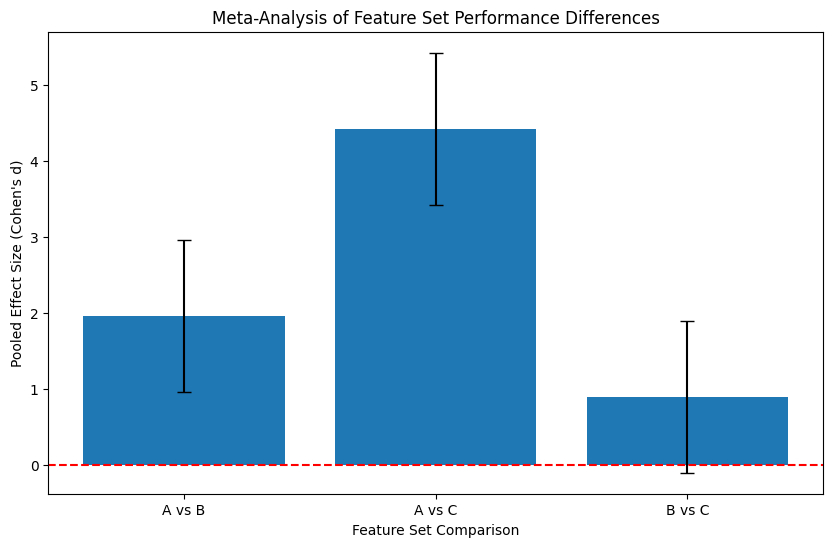

In [11]:
# Manually verifying and converting each element to the correct type for visualization
meta_df['Pooled_Effect_Size'] = meta_df['Pooled_Effect_Size'].apply(lambda x: x if isinstance(x, float) else x[0])
meta_df['Variance'] = meta_df['Variance'].apply(lambda x: x if isinstance(x, float) else x[0])
meta_df['Standard_Error'] = np.sqrt(meta_df['Variance'])

# Attempting to plot the corrected results again
plt.figure(figsize=(10, 6))
plt.bar(meta_df['Comparison'], meta_df['Pooled_Effect_Size'], yerr=meta_df['Standard_Error'], capsize=5)
plt.xlabel('Feature Set Comparison')
plt.ylabel('Pooled Effect Size (Cohen\'s d)')
plt.title('Meta-Analysis of Feature Set Performance Differences')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
import pandas as pd
import itertools
from math import sqrt

df = pd.read_csv('')
def compute_cohens_d(mean1, mean2, std1, std2):
    """Compute Cohen's d for two groups."""
    pooled_std = sqrt((std1**2 + std2**2) / 2)
    return (mean1 - mean2) / pooled_std if pooled_std != 0 else 0

# Get unique models and feature sets
models = df['Model'].unique()
feature_sets = df['Group'].unique()

# Initialize a list to store effect size results
effect_sizes = []

# Iterate over each model
for model in models:
    # Filter data for the current model
    model_data = df[df['Model'] == model]
    
    # Get all pairwise combinations of feature sets
    for group1, group2 in itertools.combinations(feature_sets, 2):
        # Extract mean and std for each feature set
        data1 = model_data[model_data['Group'] == group1]
        data2 = model_data[model_data['Group'] == group2]
        
        if not data1.empty and not data2.empty:
            mean1 = data1['mean r2'].values[0]
            mean2 = data2['mean r2'].values[0]
            std1 = data1['mean std'].values[0]
            std2 = data2['mean std'].values[0]
            
            # Compute Cohen's d
            d = compute_cohens_d(mean1, mean2, std1, std2)
            
            # Append the result
            effect_sizes.append({
                'Model': model,
                'Group1': group1,
                'Group2': group2,
                'Cohen_d': d
            })

# Create a DataFrame from the effect sizes
effect_size_df = pd.DataFrame(effect_sizes)

print(effect_size_df)
